# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [204]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge #libreria de regularizacion
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from dotenv import load_dotenv
from sqlalchemy import create_engine
import os
from funpymodeling.exploratory import freq_tbl
import seaborn as sns


In [205]:
#load the .env file variables
load_dotenv()
connection_string = os.getenv('DATABASE_URL')
#print(connection_string)

In [206]:
df_raw = pd.read_csv(connection_string)

In [207]:
df_raw.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
634,635,0,3,"Skoog, Miss. Mabel",female,9.00,3,2,347088,27.9000,NaN,S
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.00,1,2,SC/Paris 2123,41.5792,NaN,C
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


In [208]:

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [209]:
df = df_raw.copy()

In [210]:

#Paso 2:

#Explore y limpie los datos.
# Transformo la data solo de embarque y de sexo que las necesito categoricas ya que pueden ser 
# importantes como explicativas

df['Sex'] = pd.Categorical(df['Sex'])
df['Embarked'] = pd.Categorical(df['Embarked'])


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 71.7+ KB


In [212]:
df.shape

(891, 12)

In [213]:
df['Sex_encoded']=df['Sex'].apply(lambda x: 1 if x == 'female' else 0 )

In [214]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,0
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S,0
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,0


In [246]:
# Divido los datos de entrenamiento y de validacion para iniciar la exploracion 
# y el EDA
# 2.1 Split the dataset so to avoid bias

X = df.drop(['Survived','Cabin', 'Name', 'Ticket', 'Age','Sex', 'Embarked'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=70)

In [247]:
# Uno mi X_train y mi y_train en un unico DataFrame
# 2.2 Join the train sets to ease insights

df_train = pd.concat([X_train,y_train], axis=1)

In [248]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 146 to 334
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  668 non-null    int64   
 1   Pclass       668 non-null    int64   
 2   SibSp        668 non-null    int64   
 3   Parch        668 non-null    int64   
 4   Fare         668 non-null    float64 
 5   Sex_encoded  668 non-null    category
 6   Survived     668 non-null    int64   
dtypes: category(1), float64(1), int64(5)
memory usage: 37.3 KB


In [218]:
# Hasta aca mis datos quedaron limpios para trabajar

In [249]:
df_train.sample(5)

,PassengerId,Pclass,SibSp,Parch,Fare,Sex_encoded,Survived
561,562,3,0,0,7.8958,0,0
485,486,3,3,1,25.4667,1,0
885,886,3,0,5,29.1250,1,0
658,659,2,0,0,13.0000,0,0
869,870,3,1,1,11.1333,0,1


In [250]:
# Observo mis variable nuemricas

df_train.describe()

,PassengerId,Pclass,SibSp,Parch,Fare,Survived
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,443.464072,2.324850,0.482036,0.371257,31.951222,0.374251
std,258.474994,0.838099,1.014723,0.810286,51.201019,0.484292
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,216.500000,2.000000,0.000000,0.000000,7.895800,0.000000
50%,444.500000,3.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,1.000000,0.000000,30.178100,1.000000
max,891.000000,3.000000,8.000000,5.000000,512.329200,1.000000


In [251]:
from funpymodeling import freq_tbl
# 2.6 Describe categorical variables

freq_tbl(df_train)

,Sex_encoded,frequency,percentage,cumulative_perc
0,0,434,0.649701,0.649701
1,1,234,0.350299,1.000000


In [252]:
# Otra forma de ver las variables categoricas seria
df_train.describe(include='category')

,Sex_encoded
count,668
unique,2
top,0
freq,434


In [223]:
# Podemos observar que en el dataset quedaron 431 hombres y 237 mujeres

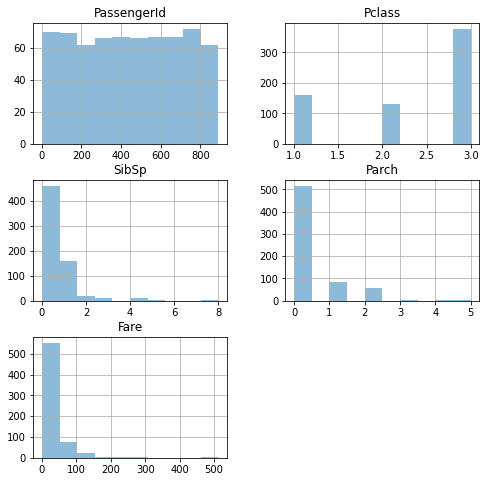

In [253]:
# veamos la distribucion de los datos numericos

X_train.hist(figsize=(8,8),alpha = 0.5)
plt.show()

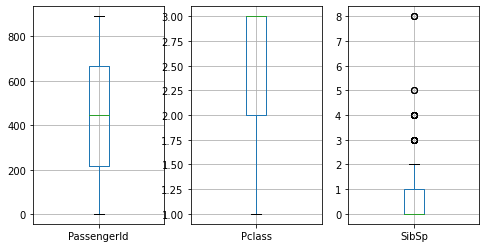

In [254]:
# 2.8 Perform univariate analysis - boxplots
fig, ax = plt.subplots(1,3,figsize =(8,4))
axs = ax.flatten()
for i in range(len(axs)):
    X_train._get_numeric_data().iloc[: , i].to_frame().boxplot(ax=axs[i])

In [226]:
# se observa en edad una mayor concentracion en edades que van de 20 a 60, en el costo del ticket
# la mayoria cae en valores por debajo de 150, y se observa una mayor cantidad de pasajeros
# en tercera clase.

In [227]:
# tal como vimos en la descripcion de las variables numericas, la edad tiene una mayor dispersion
# alcanzando un valor maximo de 84 años, tambien es interesante observar que el valor minimo se encuentra
# cercano a cero lo que nos permite inferir que podian encontrarse menores de 1 año.

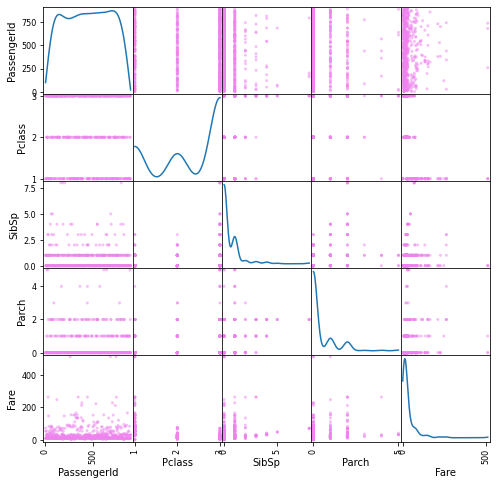

In [255]:
# 2.9 Perform bivariate analysis - numericals

pd.plotting.scatter_matrix(X_train, diagonal='kde', figsize=(8,8), c='Violet')
plt.show()

In [229]:
# no ser observan corrlaciones fuertes entre las variables numericas, lo cual es bueno
# porque no interfieren la una en el peso de la otra para la prediccion

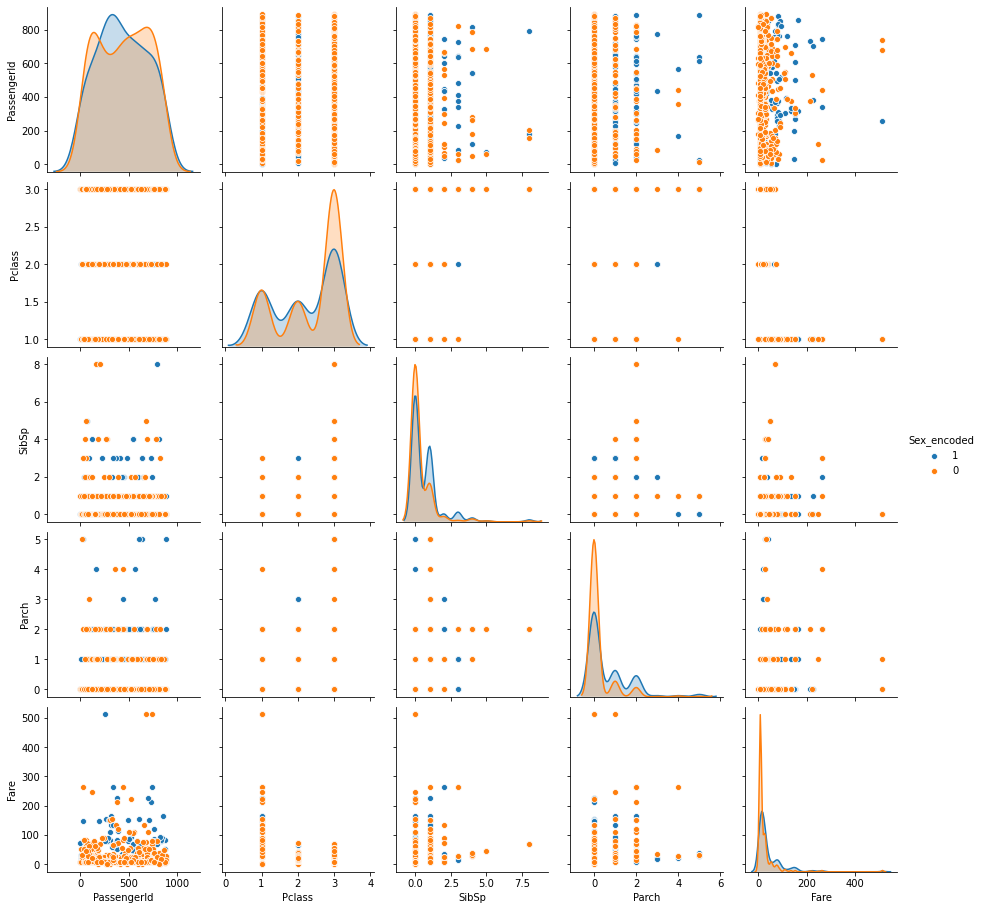

In [258]:
# 2.10 Perform bivariate analysis per category

sns.pairplot(data = X_train, hue='Sex_encoded')
plt.show()

In [231]:
# No se observa mayor varianza en los datos ni sesgo a partir de la edad, veamos 
# con la variable Clase

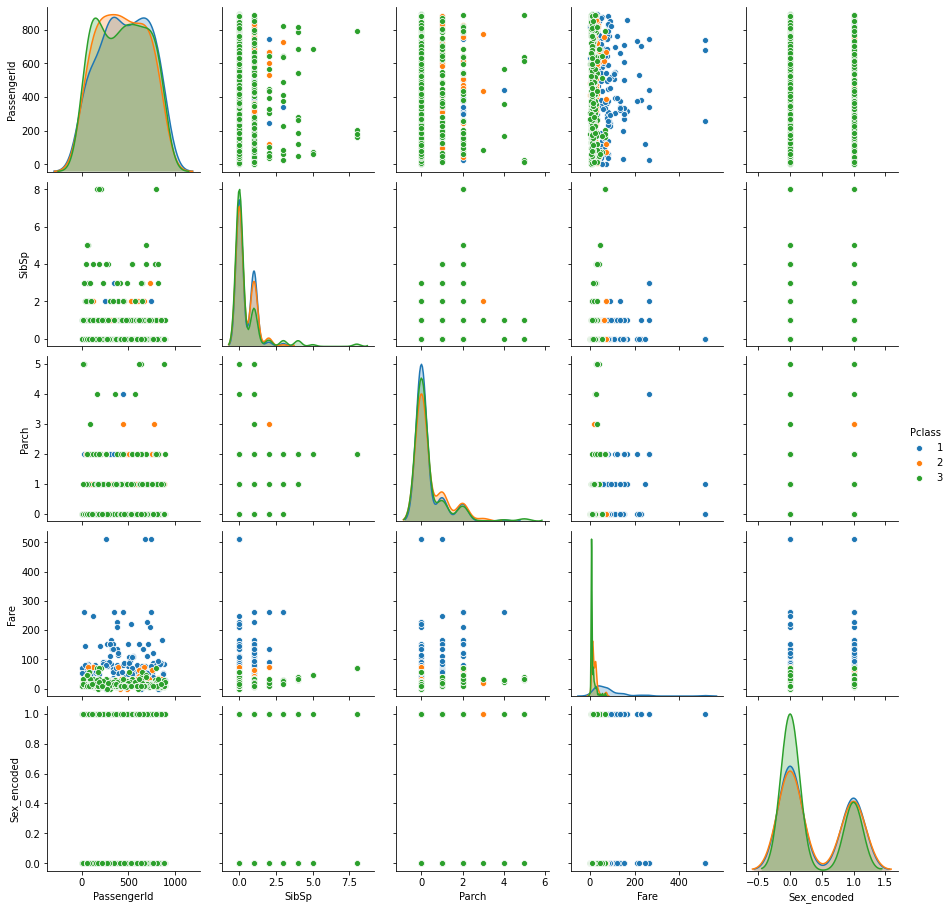

In [259]:
# observo la varianza y el sesgo por clase
sns.pairplot(data = X_train, hue='Pclass')
plt.show()

In [233]:
# Dos variables me llaman la atencion y es la relacion entre la edad y el valor del ticket
# lo cual tiene logica, pero tambien expone que las edades mas jovenes son los
# que se ubican en la tercera clase en mayor proporcion, 

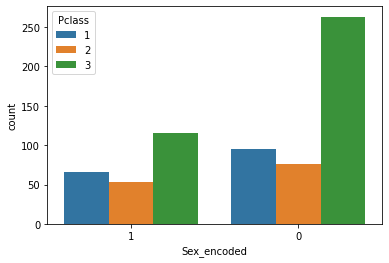

In [260]:
# Veamos como se distribuye el genero y la clase
sns.countplot(data=X_train, x='Sex_encoded', hue= 'Pclass')
plt.show()


In [261]:
# 2.10 Perform correlation analysis - Pearson or Point Biserial

X_train.corr().style.background_gradient(cmap='Blues') # si la correlacion es mayor a 75% debe llamarnos la atencion

,PassengerId,Pclass,SibSp,Parch,Fare
PassengerId,1.000000,-0.036429,-0.074942,0.005619,0.006420
Pclass,-0.036429,1.000000,0.062404,0.027457,-0.549617
SibSp,-0.074942,0.062404,1.000000,0.401984,0.149981
Parch,0.005619,0.027457,0.401984,1.000000,0.191374
Fare,0.006420,-0.549617,0.149981,0.191374,1.000000


In [236]:
# la correlacion mas elevada la encontramos en el costo del ticket y la clase, 
# por lo que no se observan riesgos de multicolinealidad a primera vista

In [262]:
df_train.corr()

,PassengerId,Pclass,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.036429,-0.074942,0.005619,0.006420,0.004371
Pclass,-0.036429,1.000000,0.062404,0.027457,-0.549617,-0.325838
SibSp,-0.074942,0.062404,1.000000,0.401984,0.149981,-0.022909
Parch,0.005619,0.027457,0.401984,1.000000,0.191374,0.069480
Fare,0.006420,-0.549617,0.149981,0.191374,1.000000,0.244508
Survived,0.004371,-0.325838,-0.022909,0.069480,0.244508,1.000000


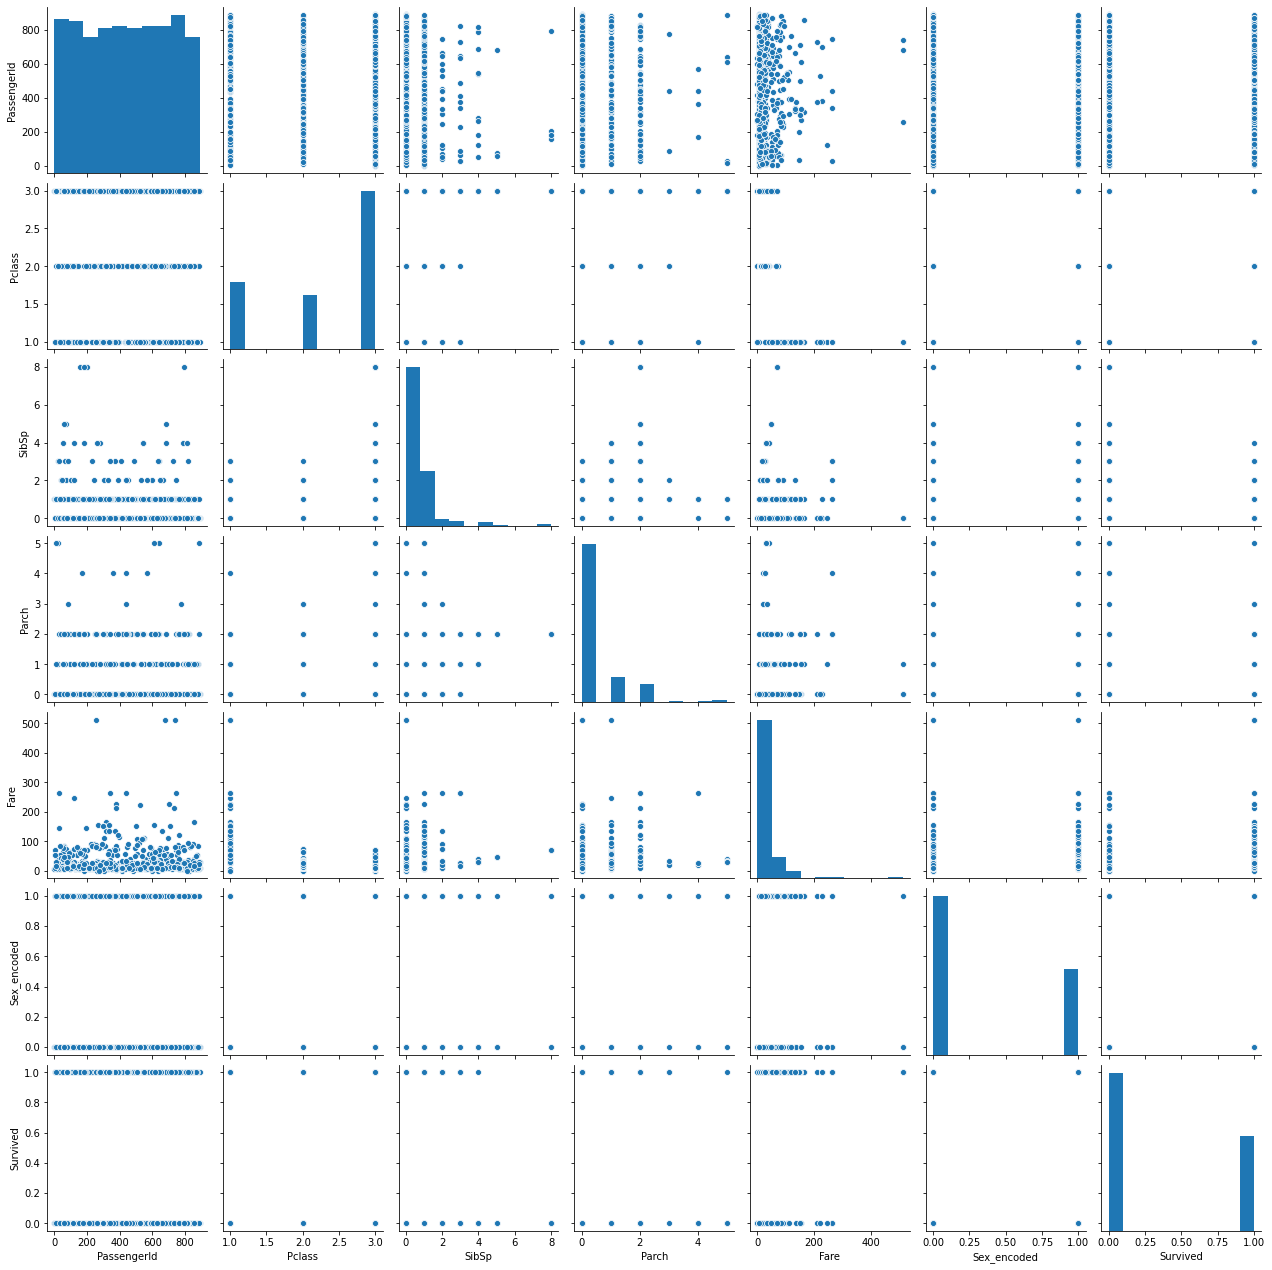

In [263]:
sns.pairplot(data=df_train)
plt.show()

In [264]:
# Preprocessing --------------------------------------------------------
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Metrics --------------------------------------------------------------
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [265]:
#Paso 3:

#Construya un primer modelo predictivo usando Random Forest. Elija una métrica de evaluación y luego optimice los hiperparámetros de su modelo.

# 3.1 Create your pipeline processing
# https://stackoverflow.com/questions/61641852/
# https://jaketae.github.io/study/sklearn-pipeline/

cat_cols = X_train.select_dtypes(include='category').columns
num_cols = X_train.select_dtypes(include='number').columns

# hacemos dos transformadores, el Onehotencoder transforma las categoricas a numericas 0 y 1

cat_transformer_d = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', sparse=False))])
cat_transformer_nd = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
num_transformer = Pipeline(steps=[('scaler',  MinMaxScaler())])
preprocessor_d = ColumnTransformer(transformers=[('num',num_transformer, num_cols),('cat',cat_transformer_d, cat_cols)])
preprocessor_nd = ColumnTransformer(transformers=[('num',num_transformer, num_cols),('cat',cat_transformer_nd, cat_cols)])
encode_data_d = Pipeline(steps=[('preprocessor', preprocessor_d)])
encode_data_nd = Pipeline(steps=[('preprocessor', preprocessor_nd)])


In [266]:
X_train.isna().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
Fare           0
Sex_encoded    0
dtype: int64

In [267]:
# Entreno al modelo para correr el Randon Forest
# 3.4 Perform model fit - C

rf_reg = Pipeline(steps=[('preprocessor', preprocessor_nd), ('regressor', RandomForestRegressor())])
rf_reg.fit(X_train,y_train)
print(f'R2 score: {rf_reg.score(X_train,y_train)}')

R2 score: 0.8979474985645933


In [ ]:
# Aca vemos que nuestro modelo segun el score es bueno en un 89% de las veces que predice
# veamos que tan cierto es esto

In [ ]:
# Otra forma de hacerlo seria

In [ ]:
X = df.drop(['Survived','Cabin', 'Name', 'Ticket', 'Age', 'Embarked', 'Sex'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=70)

In [268]:
X.corr()

,PassengerId,Pclass,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,0.083081,0.018443,-0.549500
SibSp,-0.057527,0.083081,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.159651,0.216225,1.000000


In [269]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
classifier=RandomForestClassifier(random_state=1107)

In [270]:
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1107)

In [271]:
y_pred=classifier.predict(X_test)

In [272]:
print('acurracy:', metrics.accuracy_score(y_test, y_pred))

acurracy: 0.7937219730941704


In [ ]:
# la precision bajo al 79%

In [273]:
# Veamos una ultima manera

model = RandomForestClassifier(max_depth=3)
model.fit(X,y)

RandomForestClassifier(max_depth=3)

In [274]:
a = X.sample()
a

,PassengerId,Pclass,SibSp,Parch,Fare,Sex_encoded
444,445,3,0,0,8.1125,0


In [275]:
# tenemos al pasajero Id 444, es hombre, de tercera clase, 

In [276]:
y_pred_1 = model.predict(X_train)

In [277]:
y_pred_1.shape

(668,)

In [278]:
df_train['pred'] = y_pred_1

In [279]:
df_train.sample(10)[['Survived','pred']]

,Survived,pred
504,1,1
258,1,1
461,0,0
407,1,0
877,0,0
379,0,0
666,0,0
447,1,0
597,0,0
350,0,0


In [280]:
(df_train['Survived'] == df_train['pred']).sum()

539

In [281]:
# El porcentaje de acierto cambio a 80% :)

(df_train['Survived'] == df_train['pred']).sum()/668

0.8068862275449101

In [282]:
# Paso 5
# Salvo el modelo
import pickle

filename = 'finalized_model.sav'
pickle.dump(rf_reg, open(filename, 'wb'))

In [ ]:
# XGBoost 

# Para poder predecir qué pasajeros tenían más probabilidades de sobrevivir, usaremos XGBoost para entrenar el modelo


In [300]:
X = df_train.drop(['Survived','Sex_encoded'], axis=1)
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=70)

In [ ]:
# Paso 1:

#Cree un nuevo modelo predictivo (no borre el anterior) usando XGBoost.

In [301]:
# Importo las librerias

import xgboost as xgb
from xgboost import XGBClassifier


In [302]:
# Creo el modelo

model3 = XGBClassifier()

In [303]:
model3.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

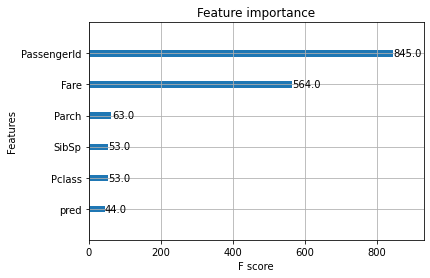

In [304]:
import matplotlib.pyplot as plt
xgb.plot_importance(model3, ax= plt.gca())

In [ ]:
# Obviando el ID del pasajero el costo del ticket es la variable que mas toma en cuenta el clasificador a la hora
# de predecir si el pasajero sobrevivira o no, seguido por si es padre o no, 

In [ ]:
# Hagamos alguna prediccion

In [305]:
predict = model3.predict(X_test)

In [308]:
predict[1:10]

array([0, 1, 1, 1, 1, 0, 1, 0, 0])

In [309]:
model3.score(X_train, y_train)

0.9960079840319361

In [ ]:
# evidentemente mi modelo padece de Overfit

In [310]:
pred_train = model3.predict(X_train)

In [311]:
from sklearn.metrics import confusion_matrix

In [312]:
confusion_matrix(y_train, pred_train)

array([[319,   0],
       [  2, 180]])

In [316]:
model3.score(X_test, y_test)

0.9820359281437125

In [318]:
confusion_matrix(y_test, predict)

array([[99,  0],
       [ 3, 65]])

In [ ]:
# Paso 3:

# Use app.py para crear su nueva canalización.

# Guarde su modelo XGBoost final en la carpeta 'modelos'.


In [320]:
# Paso 5
# Salvo el modelo
import pickle

XGBOOST_model = 'xgbboost_model.sav'
pickle.dump(model3, open(XGBOOST_model, 'wb'))